In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.simplefilter("ignore")


In [2]:
train_data = pd.read_csv("nlp-getting-started/train.csv", encoding="utf-8")


In [3]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
train_data.head(3)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [5]:
train_data.describe(include=[np.object_, np.number])


,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


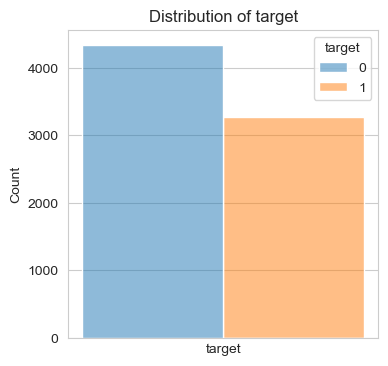

In [6]:
plt.figure(figsize=(4, 4))

sns.set_style("whitegrid")
sns.histplot(train_data, x="target", bins=[0, 0.5, 1], hue="target")

plt.xticks([])
plt.title("Distribution of target")
plt.show()


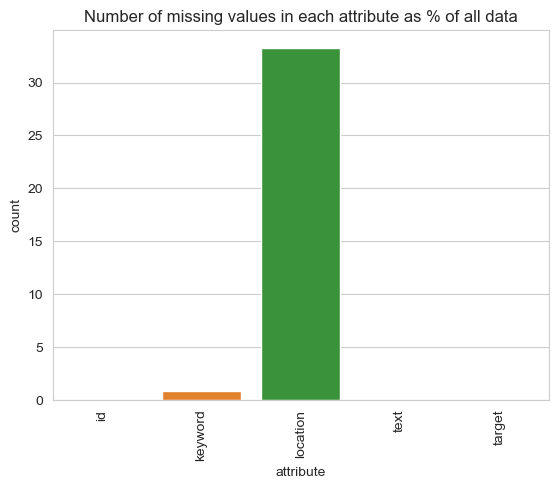

In [7]:
missing = train_data.isnull().sum() / train_data.shape[0] * 100
missing = pd.DataFrame(
    np.c_[missing, train_data.columns], columns=["count", "attribute"]
)

sns.set_style("whitegrid")
g = sns.barplot(data=missing, x="attribute", y="count")
g.tick_params("x", rotation=90)
plt.title("Number of missing values in each attribute as % of all data")
plt.show()


In [8]:
train_data["location"].value_counts()


USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [9]:
# random 5 tweets
for tweet in train_data["text"].sample(5, random_state=42):
    print(tweet)
    print()


So you have a new weapon that can cause un-imaginable destruction.

The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@

DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q

Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.

in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3



In [10]:
from tools import generate_attribs, clean_data

train_data = generate_attribs(train_data)
train_data = clean_data(train_data)


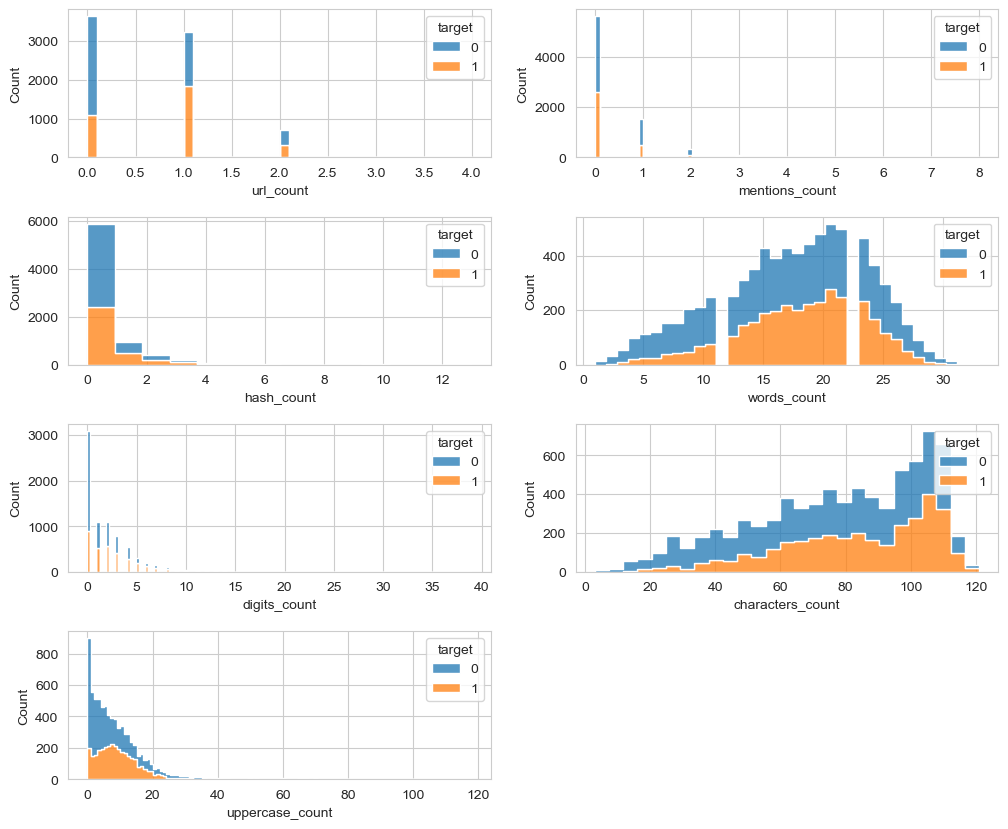

In [11]:
hists = [name for name in train_data.columns if name.endswith("_count")]

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
plt.subplots_adjust(hspace=0.4, wspace=0.2)

for i, hist in enumerate(hists):
    plt.subplot(4, 2, i + 1)
    sns.histplot(
        data=train_data, x=hist, hue="target", multiple="stack", element="step"
    )

plt.show()


In [12]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
from tools import DataPreprocessor

data_preprocessor = DataPreprocessor()

# warning, takes 50 min
train_data = data_preprocessor.preprocess(train_data, fit=True, root="train_data_loc")

# works only if locations are downloaded via data_preprocessor.preprocess(hot_start=False)
# train_data = data_preprocessor.preprocess(
#     train_data, fit=True, root="training_data_loc", hot_start=True
# )

0 just made 0. (1523 to go)
2 just made 0. (1523 to go)
3 just made 0. (1523 to go)
4 just made 0. (1516 to go)
1 just made 0. (1523 to go)
0 just made 100. (1423 to go)
2 just made 100. (1423 to go)
4 just made 100. (1416 to go)
3 just made 100. (1423 to go)
1 just made 100. (1423 to go)
0 just made 200. (1323 to go)
4 just made 200. (1316 to go)
3 just made 200. (1323 to go)
2 just made 200. (1323 to go)
1 just made 200. (1323 to go)
0 just made 300. (1223 to go)
4 just made 300. (1216 to go)
2 just made 300. (1223 to go)
3 just made 300. (1223 to go)
1 just made 300. (1223 to go)
0 just made 400. (1123 to go)
4 just made 400. (1116 to go)
2 just made 400. (1123 to go)
3 just made 400. (1123 to go)
1 just made 400. (1123 to go)
4 just made 500. (1016 to go)
2 just made 500. (1023 to go)
0 just made 500. (1023 to go)
3 just made 500. (1023 to go)
1 just made 500. (1023 to go)
4 just made 600. (916 to go)
2 just made 600. (923 to go)
0 just made 600. (923 to go)
3 just made 600. (923 t

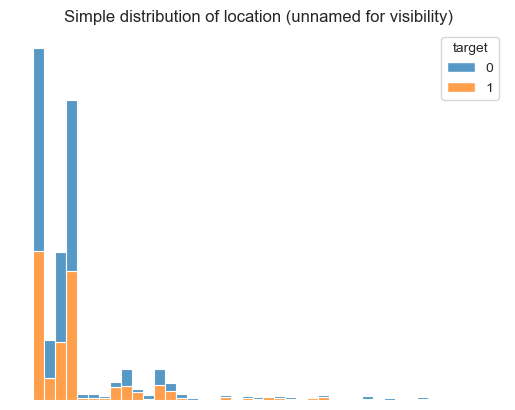

In [14]:
plt.title("Simple distribution of location (unnamed for visibility)")
sns.histplot(data=train_data, x="location", hue="target", multiple="stack")
plt.axis("off") 
plt.show()


In [15]:
os.makedirs("data", exist_ok=True)
train_data.to_csv(os.path.join("data", "train_pure.csv"), index=False)


In [16]:
X_train, y_train = train_data.drop(axis=1, columns=["target"]), train_data["target"]


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7613 non-null   int64 
 1   keyword           7613 non-null   object
 2   location          7613 non-null   object
 3   text              7613 non-null   object
 4   url_count         7613 non-null   int64 
 5   mentions_count    7613 non-null   int64 
 6   hash_count        7613 non-null   int64 
 7   words_count       7613 non-null   int64 
 8   digits_count      7613 non-null   int64 
 9   characters_count  7613 non-null   int64 
 10  uppercase_count   7613 non-null   int64 
 11  sentiment         7613 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 713.8+ KB


In [18]:
from tools import DataTokenizer

data_tokenizer = DataTokenizer()
data_tokenizer.fit(X_train)
X_train = data_tokenizer.transform(X_train)


In [19]:
def save_data(data, name):
    pd.DataFrame(data).to_csv(os.path.join("data", name), index=False)


In [20]:
save_data(X_train, "X_train_pure.csv")
save_data(y_train, "y_train.csv")


In [21]:
import pickle
from tools import XPipeline

data_pipeline = XPipeline(data_preprocessor, data_tokenizer)

os.makedirs("pipelines", exist_ok=True)
with open(os.path.join("pipelines", "x_pipeline_pure.pkl"), "wb") as file:
    pickle.dump(data_pipeline, file)